# Обнуление маловажной статистики
**На основе изменения множественной регрессии** (единственный Y)

Полный перебор всевозможных вариантов

# Импорт библиотек

In [290]:
import numpy as np
import pandas as pd

import pylab as plb
import matplotlib.pyplot as plt

import sys

from scipy.stats import linregress

import statsmodels.api as sm

import copy
import time

# Загрузка и обработка статистики

In [291]:
# ------------ Источник ------------ #

url = "https://raw.githubusercontent.com/ForestTiger-GH/COTRA/main/Stat_wheat/Test_trend20_x5_annually/4y_2011-2014.txt"

name = "Trend 20    4 years  2011-2014  "

downloaded_url = pd.read_csv(url,
               sep='\t', 
               error_bad_lines=False,
               decimal=',',
               encoding='gbk', 
               skiprows=1)

In [292]:
a = np.asarray(downloaded_url)
columns_all = np.array(a).T

column_dates = columns_all[0].tolist()
width_all = len(a[0])                                                            # Количество всех столбцов
width_y = 1                                                                      # Количество Y (всегда 1)
width_x = width_all - 1 - width_y                                                # Количество Х

column_dates = columns_all[0]                                                    # Столбец дат
np.array(column_dates)
column_y = columns_all[width_all-1]                                              # Столбец Y
np.array(column_y)

lenght_all = len(column_dates)                                                   # Количество строк (на основе дат)

In [293]:
columns_x_all = np.array(columns_all[1:(len(columns_all)-1)]).tolist()           # Группа столбцов X
np.array(columns_x_all).tolist()

lol = lambda lst, sz: [lst[i:i+sz] for i in range(0, len(lst), sz)]
columns_x_all = lol(columns_x_all, width_x)
columns_x_all = columns_x_all[0]

columns_x_all_old = copy.deepcopy(columns_x_all)                                 # Глубокая копия для сравнения регрессий в конце

# Уровень check rate

In [294]:
check_rate = 0.1                                                                 # Точность проверки (0.1 или 0.01)
check_rate_amount = round(1/check_rate)                                             # то есть 10 вариаций или 100 
check_rate_list = (np.arange(0, 1, check_rate)).tolist()                         # Список уровней (проверка будет на каждом)
check_rate_count = (np.arange(0, check_rate_amount, 1)).tolist()

# Обработка данных

In [295]:
# ------------ Функции ------------ #
def reg_m(yyy, xxx):
    ones = np.ones(len(xxx[0]))
    X = sm.add_constant(np.column_stack((xxx[0], ones)))
    for ele in xxx[1:]:
        X = sm.add_constant(np.column_stack((ele, X)))
    results = sm.OLS(yyy, X).fit()
    return results

def demark(enter_border_x1, enter_x1_step_value):
    for i in range(check_rate_amount):
        enter_border_x1.append(check_rate_list[i]*enter_x1_step_value*check_rate_amount)
    return enter_border_x1

def nullify(set_column_x1, set_border_x1, set_A):
    for z in range(lenght_all):
        if abs(set_column_x1[z]) < set_border_x1[set_A]:
            set_column_x1[z] = 0
    return set_column_x1

In [296]:
# ------------ Резервная копия столбцов ------------ #
column_x1_old = columns_x_all[0]
column_x2_old = columns_x_all[1]
column_x3_old = columns_x_all[2]
column_x4_old = columns_x_all[3]
column_x5_old = columns_x_all[4]

# ------------ Расчет всех шагов и бордеров ------------ #
column_x1 = columns_x_all[0]
column_x2 = columns_x_all[1]
column_x3 = columns_x_all[2]
column_x4 = columns_x_all[3]
column_x5 = columns_x_all[4]

x1_step_value = max(np.abs(column_x1).tolist())/check_rate_amount
x2_step_value = max(np.abs(column_x2).tolist())/check_rate_amount
x3_step_value = max(np.abs(column_x3).tolist())/check_rate_amount
x4_step_value = max(np.abs(column_x4).tolist())/check_rate_amount
x5_step_value = max(np.abs(column_x5).tolist())/check_rate_amount

border_x1 = []
border_x2 = []
border_x3 = []
border_x4 = []
border_x5 = []

demark(border_x1, x1_step_value)
demark(border_x2, x2_step_value)
demark(border_x3, x3_step_value)
demark(border_x4, x4_step_value)
demark(border_x5, x5_step_value)

print()

In [297]:
start_time = time.time()   # таймер

# ------------ Начало цикла ------------ #

list_Rsquare_all = []
list_x1_all = []
list_x2_all = []
list_x3_all = []
list_x4_all = []
list_x5_all = []

for a in range(check_rate_amount):
    column_x1 = []
    column_x1 = copy.deepcopy(column_x1_old)
    nullify(column_x1, border_x1, a)

    for c in range(check_rate_amount):
        column_x2 = []
        column_x2 = copy.deepcopy(column_x2_old)   
        nullify(column_x2, border_x2, c)

        for e in range(check_rate_amount):
            column_x3 = []
            column_x3 = copy.deepcopy(column_x3_old)
            nullify(column_x3, border_x3, e)

            for g in range(check_rate_amount):
                column_x4 = []
                column_x4 = copy.deepcopy(column_x4_old)
                nullify(column_x4, border_x4, g)

                for i in range(check_rate_amount):
                    column_x5 = []
                    column_x5 = copy.deepcopy(column_x5_old)
                    nullify(column_x5, border_x5, i)

                    # sys.stdout.write("\rProgress: {} %            Decryption: {} {} {} {} {}            {}s seconds     ".format(
                    #       str(round((int("".join([str(l) for l in [a, c, e, g, i]]))/check_rate_amount**width_x)*100, 1)),
                    #       str(100*a/float(check_rate_amount))[:1],
                    #       str(100*c/float(check_rate_amount))[:1],
                    #       str(100*e/float(check_rate_amount))[:1],
                    #       str(100*g/float(check_rate_amount))[:1],
                    #       str(100*i/float(check_rate_amount))[:1],
                    #       str(time.time() - start_time)[:4]
                    #       ))

                    columns_x_all[0] = column_x1
                    columns_x_all[1] = column_x2
                    columns_x_all[2] = column_x3
                    columns_x_all[3] = column_x4
                    columns_x_all[4] = column_x5
                    
                    yyy = column_y
                    xxx = columns_x_all
                    yyy = np.array(yyy,'float32')
                    xxx = np.array(xxx,'float32')
                    list_Rsquare_all.append(reg_m(yyy, xxx).rsquared)

                    list_x1_all.append(reg_m(yyy, xxx).params[0])
                    list_x2_all.append(reg_m(yyy, xxx).params[1])
                    list_x3_all.append(reg_m(yyy, xxx).params[2])
                    list_x4_all.append(reg_m(yyy, xxx).params[3])
                    list_x5_all.append(reg_m(yyy, xxx).params[4])

                    #print(a, c, e, g, i, '    ', reg_m(yyy, xxx).rsquared)    
print(time.time() - start_time, " seconds")

473.3970251083374  seconds


In [298]:
# ------------ Поиск номера лучшего R-квадрат по общему списку ------------ #
if abs(max(list_Rsquare_all)) >= abs(min(list_Rsquare_all)):
    best_Rsquare = max(list_Rsquare_all)
else:
    best_Rsquare = min(list_Rsquare_all)
best_position_number = list_Rsquare_all.index(best_Rsquare)

# ------------ Расшифровка номера лучшего R-квадрат ------------ #
list_best_positions = list(str(best_position_number).zfill(width_x))      # может быть косяк при вводе чек рейта 0.01
list_best_positions = [int(item) for item in list_best_positions]

best_position_number_x1 = list_best_positions[0]
best_position_number_x2 = list_best_positions[1]
best_position_number_x3 = list_best_positions[2]
best_position_number_x4 = list_best_positions[3]
best_position_number_x5 = list_best_positions[4]

# ------------ Формирование нового массива Х-ов ------------ #
column_x1_new = copy.deepcopy(columns_x_all_old[0])
column_x2_new = copy.deepcopy(columns_x_all_old[1])
column_x3_new = copy.deepcopy(columns_x_all_old[2])
column_x4_new = copy.deepcopy(columns_x_all_old[3])
column_x5_new = copy.deepcopy(columns_x_all_old[4])

for a in range(lenght_all):
    if abs(column_x1_new[a]) < border_x1[best_position_number_x1]:
        column_x1_new[a] = 0
for b in range(lenght_all):
    if abs(column_x2_new[b]) < border_x2[best_position_number_x2]:
        column_x2_new[b] = 0
for c in range(lenght_all):
    if abs(column_x3_new[c]) < border_x3[best_position_number_x3]:
        column_x3_new[c] = 0
for d in range(lenght_all):
    if abs(column_x4_new[d]) < border_x4[best_position_number_x4]:
        column_x4_new[d] = 0
for e in range(lenght_all):
    if abs(column_x5_new[e]) < border_x5[best_position_number_x5]:
        column_x5_new[e] = 0

group_x = []
group_x.append(column_x1_new)
group_x.append(column_x2_new)
group_x.append(column_x3_new)
group_x.append(column_x4_new)
group_x.append(column_x5_new)

# Результаты обработки

In [299]:
print("Результат оптимизации статистики")
print("--------------------------------", end="\n\n")
print("Лучшие уровни отсечки (сколько нужно срезать; в процентах на уровень Check_rate (10 или 100))", end="\n")
print("Было:    [0, 0, 0, 0, 0]")
print("Стало:   {}".format(
    str(list_best_positions)
    ), end="\n\n")

print("Оптимизация R-квадрат:", end="\n")
print("Было:    {} %".format(
    str(round(reg_m(np.array(column_y,'float32'), np.array(columns_x_all_old,'float32')).rsquared*100, 2))
    ))
print("Стало:   {} %".format(
    str(round(reg_m(np.array(column_y,'float32'), np.array(group_x,'float32')).rsquared*100, 2))
    ))

Результат оптимизации статистики
--------------------------------

Лучшие уровни отсечки (сколько нужно срезать; в процентах на уровень Check_rate (10 или 100))
Было:    [0, 0, 0, 0, 0]
Стало:   [5, 6, 7, 9, 0]

Оптимизация R-квадрат:
Было:    21.52 %
Стало:   24.44 %


R-квадрат:  0.2444       Порядковый номер в общем списке:  56790



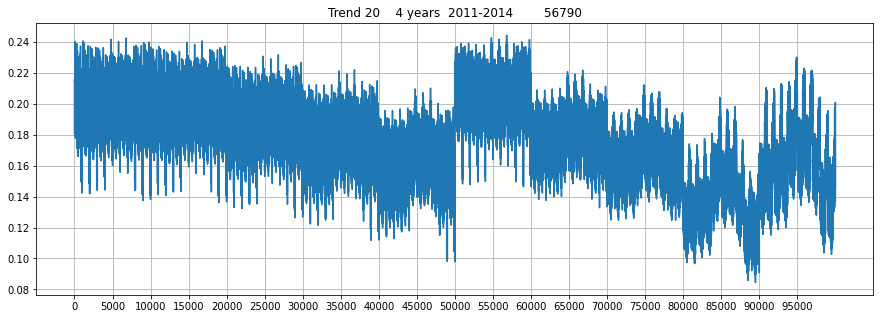

X1, синий:      -4.86
X2, оранжевый:  -3.42
X3, зеленый:    -5.58
X4, красный:    2.59
X5, фиолетовый: 9.63


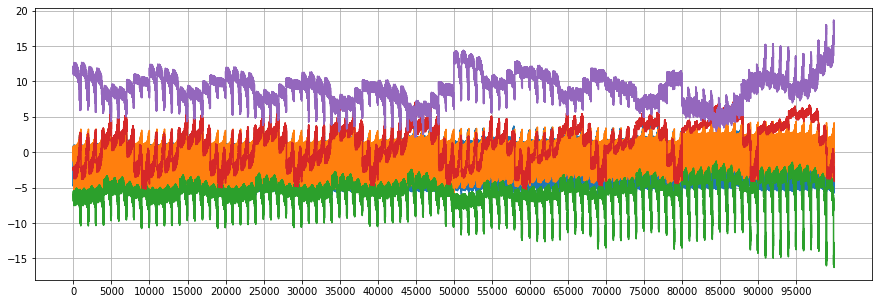

In [300]:
ax_x = (np.arange(0, len(list_Rsquare_all), 5000)).tolist()

print("R-квадрат: ", round(best_Rsquare, 4), "      Порядковый номер в общем списке: ", best_position_number, end="\n\n")
plt.figure(figsize=(15,5))
plt.xticks(ax_x)
plt.grid()
plt.title(name+"      "+str(best_position_number))
plt.plot(list_Rsquare_all)
plt.show()
print("X1, синий:      {}".format(str(round(list_x1_all[best_position_number], 2))))
print("X2, оранжевый:  {}".format(str(round(list_x2_all[best_position_number], 2))))
print("X3, зеленый:    {}".format(str(round(list_x3_all[best_position_number], 2))))
print("X4, красный:    {}".format(str(round(list_x4_all[best_position_number], 2))))
print("X5, фиолетовый: {}".format(str(round(list_x5_all[best_position_number], 2))))
plt.figure(figsize=(15,5))
plt.xticks(ax_x)
plt.grid()
plt.plot(list_x1_all)
plt.plot(list_x2_all)
plt.plot(list_x3_all)
plt.plot(list_x4_all)
plt.plot(list_x5_all)
plt.show()

In [301]:
# Сводка всех результатов регрессии До и После
print(reg_m(np.array(column_y,'float32'), np.array(columns_x_all_old,'float32')).summary(), end="\n\n")
print('█████████████████████████████████████████████████████████████', end="\n\n")
print(reg_m(np.array(column_y,'float32'), np.array(group_x,'float32')).summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     11.14
Date:                Sun, 14 Mar 2021   Prob (F-statistic):           1.71e-09
Time:                        17:34:49   Log-Likelihood:                -756.58
No. Observations:                 209   AIC:                             1525.
Df Residuals:                     203   BIC:                             1545.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -4.6766      1.559     -3.000      0.0

# Вывод статистики

In [302]:
columns = []
#columns.append("Dates")        ### пока без дат
for b in range(width_x):
    alfa = "X_{}".format(str(b+1))
    columns.append(alfa)
    alfa = []
columns.append("Y_1")

In [303]:
beta = np.array(group_x).T
merged_one = []
merged_all = []

#np.array(column_dates)

for g in range(len(beta)):
    merged_one = []
    merged_one.append(beta[g].tolist())
    merged_one.append(column_y[g])
    np.array(merged_one)
    merged_all.append(merged_one)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()


In [304]:
csv_half_ready = []
csv_ready = []

for k in range(len(merged_all)):
      for f in range(len(merged_all[0][0])):
          csv_half_ready.append(merged_all[k][0][f])
      csv_half_ready.append(merged_all[k][1])
      np.array(csv_half_ready)
      csv_ready.append(csv_half_ready)
      csv_half_ready = []

In [305]:
data = csv_ready
df = pd.DataFrame(data, columns=columns)
df.to_csv(index=False)

'X_1,X_2,X_3,X_4,X_5,Y_1\n0.0,0.0,0.0,0.0,-0.83382746198,-4\n0.0,0.0,0.0,0.0,-0.7424505603399999,-3\n0.0,0.0,0.0,0.0,-0.6293431015300001,-6\n0.0,0.0,0.0,0.0,-0.53898584625,-11\n0.0,0.0,0.0,0.0,-0.42973283802,-11\n0.0,0.0,0.0,0.0,-0.30230655112,-19\n0.0,0.0,0.0,0.0,-0.14986499864,-14\n0.0,0.0,0.0,0.0,-0.041209558910000006,-4\n0.0,0.0,0.0,0.0,0.00246753522,-6\n0.0,0.0,0.0,0.0,0.10177491226,-2\n0.0,0.0,0.0,0.0,0.28944877446,11\n0.0,0.0,0.0,0.0,0.4746703988,0\n0.0,0.0,0.0,0.0,0.6173925853100001,-2\n0.0,0.0,0.0,0.0,0.6191718298100001,-9\n0.0,0.0,0.0,0.0,0.6192205685800001,-6\n0.0,0.0,0.0,0.0,0.78898121103,-11\n0.0,0.0,0.0,0.0,0.7152767701899999,-14\n0.0,0.0,0.0,0.0,0.64074904573,-9\n0.0,0.0,0.0,0.0,0.54487696505,-13\n0.0,0.0,-0.66728695371,0.0,0.46114486585000003,-12\n-0.5474981994,0.0,-0.7101664454000001,0.0,0.36718709396,-15\n-0.64149252361,0.0,-0.73363223955,0.0,0.20848509447,-16\n-0.73631039848,0.0,-0.7911682192,0.0,0.07420191988,-10\n-0.79675398654,0.0,-0.84336226416,0.0,0.005322935139